# Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[банковские транзакции](https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zerocoder/python/pn14/bank_clients_transactions.csv')

In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


# Приведение столбцов к стилю camel_case

In [ ]:
# Функция для преобразования строки в camelCase
def to_camel_case(s):
    s = s.replace('_', ' ').replace('-', ' ')  # Заменяем подчеркивания и дефисы на пробелы
    words = s.split()  # Разбиваем строку на слова
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Применяем функцию к именам столбцов
df.columns = [to_camel_case(col) for col in df.columns]

df.columns

Index(['transactionid', 'customerid', 'customerdob', 'custgender',
       'custlocation', 'custaccountbalance', 'transactiondate',
       'transactiontime', 'transactionamount(inr)'],
      dtype='object')

# Приведение типов данных

In [ ]:
#привести дату к типу datetime
df['customerdob'] = pd.to_datetime(df['customerdob'],  dayfirst=True)
df['transactiondate'] = pd.to_datetime(df['transactiondate'],  dayfirst=True)

<ipython-input-8-99e66db54539>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['customerdob'] = pd.to_datetime(df['customerdob'],  dayfirst=True)
<ipython-input-8-99e66db54539>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transactiondate'] = pd.to_datetime(df['transactiondate'],  dayfirst=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   transactionid           1048567 non-null  object        
 1   customerid              1048567 non-null  object        
 2   customerdob             1045170 non-null  datetime64[ns]
 3   custgender              1047467 non-null  object        
 4   custlocation            1048416 non-null  object        
 5   custaccountbalance      1046198 non-null  float64       
 6   transactiondate         1048567 non-null  datetime64[ns]
 7   transactiontime         1048567 non-null  int64         
 8   transactionamount(inr)  1048567 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 72.0+ MB


# Поиск дублей и пропусков в данных

In [ ]:
# Удаление дубликатов
df = df.drop_duplicates()

# Заполнение пропусков
df = df.fillna(0)
# Поиск пропусков

missing_values = df.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

# Поиск дубликатов
duplicates = df[df.duplicated()]
print("Дубликаты:")
print(duplicates)

Пропущенные значения:
transactionid             0
customerid                0
customerdob               0
custgender                0
custlocation              0
custaccountbalance        0
transactiondate           0
transactiontime           0
transactionamount(inr)    0
dtype: int64
Дубликаты:
Empty DataFrame
Columns: [transactionid, customerid, customerdob, custgender, custlocation, custaccountbalance, transactiondate, transactiontime, transactionamount(inr)]
Index: []


# Исследовательский анализ данных

In [ ]:
df

,transactionid,customerid,customerdob,custgender,custlocation,custaccountbalance,transactiondate,transactiontime,transactionamount(inr)
0,T1,C5841053,1994-01-10 00:00:00,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04 00:00:00,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26 00:00:00,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,2073-09-14 00:00:00,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24 00:00:00,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08 00:00:00,M,NEW DELHI,7635.19,2016-09-18,184824,799.0
1048563,T1048564,C6459278,1992-02-20 00:00:00,M,NASHIK,27311.42,2016-09-18,183734,460.0
1048564,T1048565,C6412354,1989-05-18 00:00:00,M,HYDERABAD,221757.06,2016-09-18,183313,770.0
1048565,T1048566,C6420483,1978-08-30 00:00:00,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0


In [ ]:
# сколько уникальных клиентов?
# Количество уникальных клиентов
unique_customers = df['customerid'].nunique()
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных клиентов: 884265


In [ ]:
# какое количество транзакций было совершено?
# Общее количество транзакций
total_transactions = len(df)
print(f"Общее количество транзакций: {total_transactions}")

Общее количество транзакций: 1048567


In [ ]:
# сколько в среднем транзакций приходится на одного клиента?
# Общее количество транзакций
total_transactions = len(df)

# Количество уникальных клиентов
unique_customers = df['customerid'].nunique()

# Среднее количество транзакций на клиента
average_transactions_per_customer = total_transactions / unique_customers

print(f"Среднее количество транзакций на клиента: {average_transactions_per_customer:.2f}")

Среднее количество транзакций на клиента: 1.19


In [ ]:
# изучить распределение и размах величин CustAccountBalance и TransactionAmount
# Описательная статистика для CustAccountBalance
print("Описательная статистика для CustAccountBalance:")
print(df['custaccountbalance'].describe())

# Описательная статистика для TransactionAmount
print("\nОписательная статистика для TransactionAmount:")
print(df['transactionamount(inr)'].describe())

Описательная статистика для CustAccountBalance:
count    1.048567e+06
mean     1.151428e+05
std      8.455464e+05
min      0.000000e+00
25%      4.664230e+03
50%      1.670949e+04
75%      5.747288e+04
max      1.150355e+08
Name: custaccountbalance, dtype: float64

Описательная статистика для TransactionAmount:
count    1.048567e+06
mean     1.574335e+03
std      6.574743e+03
min      0.000000e+00
25%      1.610000e+02
50%      4.590300e+02
75%      1.200000e+03
max      1.560035e+06
Name: transactionamount(inr), dtype: float64


Количество некорректных значений: 0
        customerid customerdob  age
0         C5841053  1994-01-10   31
1         C2142763  2057-04-04  -33
2         C4417068  1996-11-26   28
3         C5342380  2073-09-14  -49
4         C9031234  1988-03-24   37
...            ...         ...  ...
1048562   C8020229  1990-04-08   34
1048563   C6459278  1992-02-20   33
1048564   C6412354  1989-05-18   35
1048565   C6420483  1978-08-30   46
1048566   C8337524  1984-03-05   41

[1045170 rows x 3 columns]


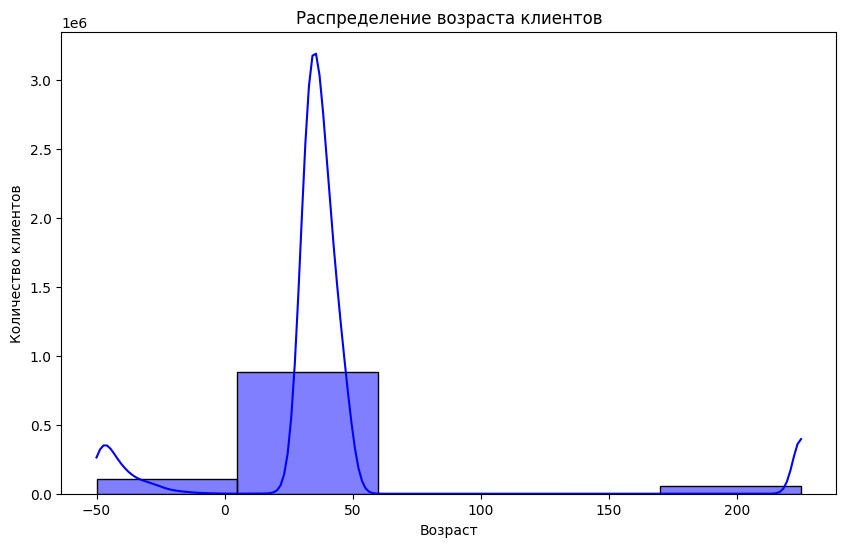

In [ ]:
# изучить возраст клиентов (визуализировать)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Удаляем строки с некорректными датами
df = df.dropna(subset=['customerdob'])
# Количество некорректных значений
print(f"Количество некорректных значений: {df['customerdob'].isnull().sum()}")

# Рассчитываем возраст клиентов
current_date = pd.Timestamp.now()
df['age'] = (current_date - df['customerdob']).dt.days // 365
print(df[['customerid', 'customerdob', 'age']])

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=5, kde=True, color='blue')
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

['F' 'M' 0 'T']
Количество пропущенных значений: 0


<ipython-input-46-6ec540458096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='custgender', palette='Set2')


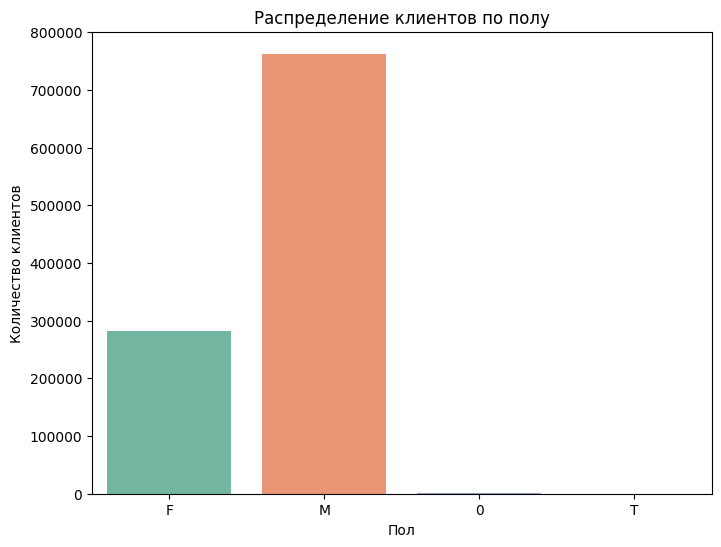

In [ ]:
# изучить пол клиентов (визуализировать)
# Проверка уникальных значений в столбце custgender
print(df['custgender'].unique())

# Количество пропущенных значений
print(f"Количество пропущенных значений: {df['custgender'].isnull().sum()}")
# Гистограмма распределения клиентов по полу
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='custgender', palette='Set2')
plt.title('Распределение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' ... 'KARANJIA'
 'NR HERITAGE FRESH HYDERABAD' 'IMPERIA THANE WEST']
Количество пропущенных значений: 0
custlocation
MUMBAI       103012
NEW DELHI     84352
BANGALORE     81434
GURGAON       73666
DELHI         70751
NOIDA         32734
CHENNAI       29914
PUNE          25775
HYDERABAD     23017
THANE         21490
Name: count, dtype: int64


<ipython-input-51-ed59c96c7d14>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')


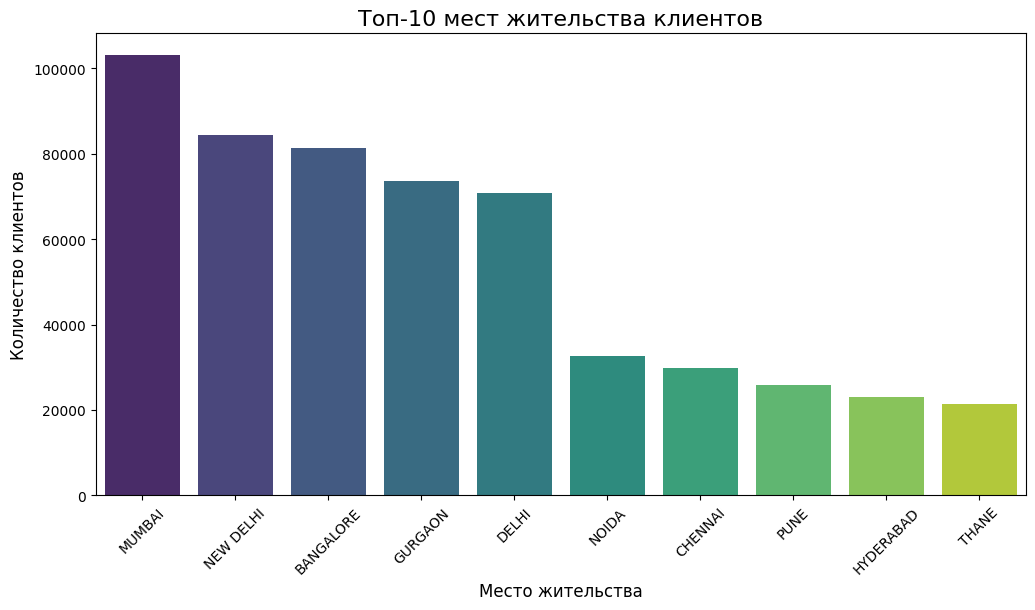

In [ ]:
# изучить место жительства клиентов (визуализировать)
# Проверка уникальных значений в столбце custlocation
print(df['custlocation'].unique())

# Количество пропущенных значений
print(f"Количество пропущенных значений: {df['custlocation'].isnull().sum()}")
# Подсчет количества клиентов в каждом месте жительства
location_counts = df['custlocation'].value_counts()

# Выбор топ-10 мест жительства
top_10_locations = location_counts.head(10)
print(top_10_locations)
# Гистограмма топ-10 мест жительства
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')
plt.title('Топ-10 мест жительства клиентов', fontsize=16)
plt.xlabel('Место жительства', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей для лучшей читаемости
plt.show()

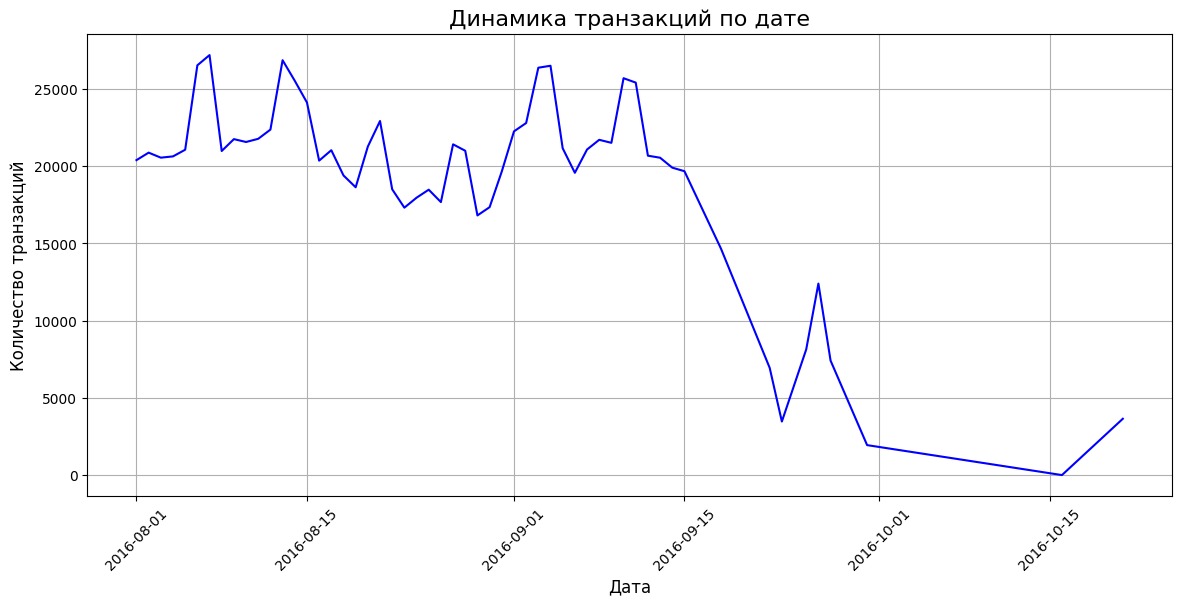

In [ ]:
# посмотреть динамику транзакций по дате (в кол-ве TransactionID)
# Группировка по дате и подсчет количества транзакций
transactions_by_date = df.groupby(df['transactiondate'].dt.date)['transactionid'].count()

# Преобразуем результат в DataFrame для удобства
transactions_by_date = transactions_by_date.reset_index()
transactions_by_date.columns = ['date', 'transaction_count']

# Линейный график динамики транзакций
plt.figure(figsize=(14, 6))
sns.lineplot(data=transactions_by_date, x='date', y='transaction_count', color='blue')
plt.title('Динамика транзакций по дате', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей для лучшей читаемости
plt.grid(True)
plt.show()

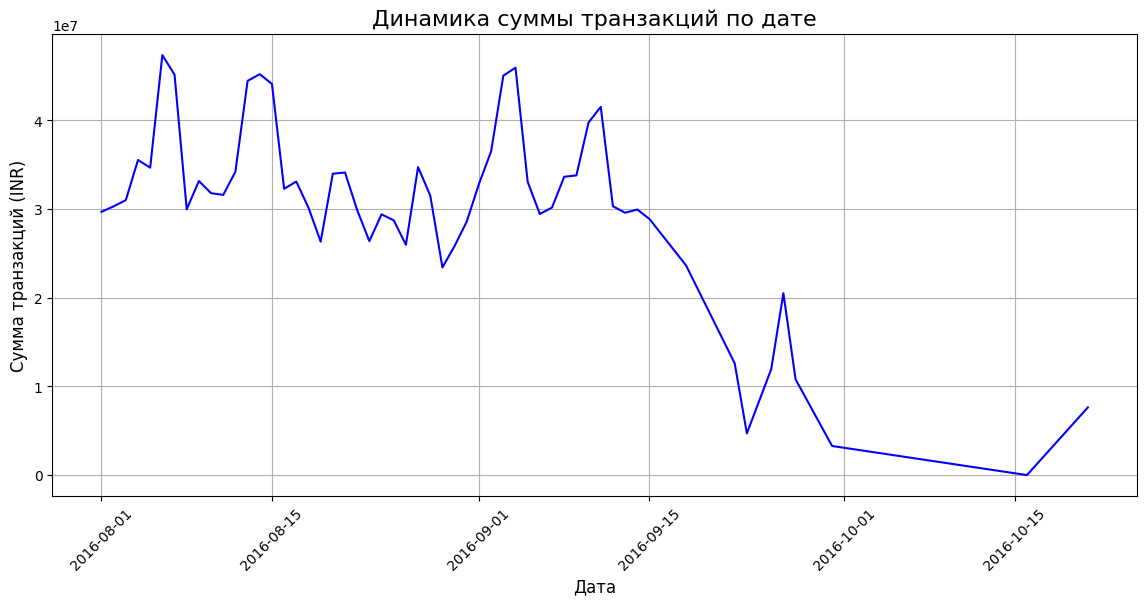

In [ ]:
# посмотреть динамику транзакций по дате (в сумме TransactionAmount)
# Группировка по дате и подсчет суммы транзакций
transactions_by_date = df.groupby(df['transactiondate'].dt.date)['transactionamount(inr)'].sum()

# Преобразуем результат в DataFrame для удобства
transactions_by_date = transactions_by_date.reset_index()
transactions_by_date.columns = ['date', 'total_transaction_amount']

# Линейный график динамики суммы транзакций
plt.figure(figsize=(14, 6))
sns.lineplot(data=transactions_by_date, x='date', y='total_transaction_amount', color='blue')
plt.title('Динамика суммы транзакций по дате', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей для лучшей читаемости
plt.grid(True)
plt.show()

<ipython-input-64-16bd681a9b06>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_transaction_by_age_group = df.groupby('age_group')['transactionamount(inr)'].sum()
<ipython-input-64-16bd681a9b06>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_transaction_by_age_group, x='age_group', y='total_transaction_amount', palette='viridis')


Самая платежеспособная группа: 36-50 с общей суммой транзакций: 756401860.76 INR


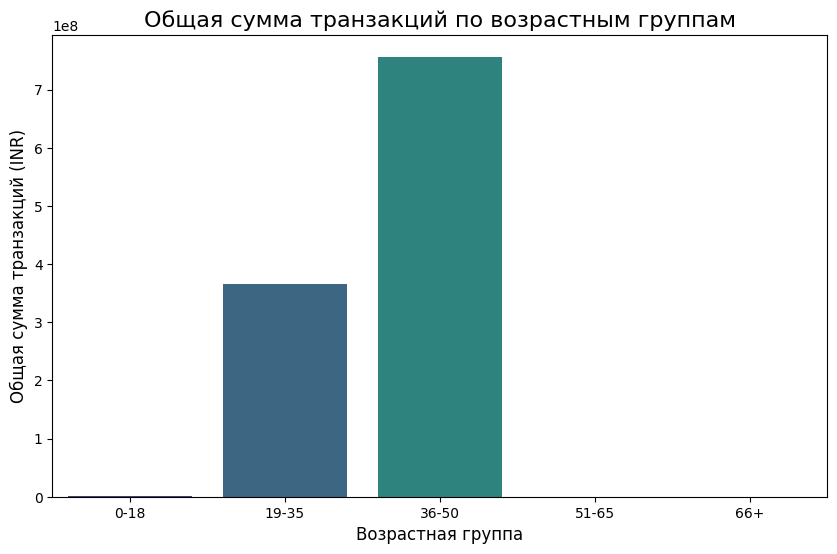

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
# Создание возрастных корзин
bins = [0, 18, 35, 50, 65, 100]  # Диапазоны возрастов
labels = ['0-18', '19-35', '36-50', '51-65', '66+']  # Названия групп
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Группировка по возрастным группам и подсчет общей суммы транзакций
total_transaction_by_age_group = df.groupby('age_group')['transactionamount(inr)'].sum()

# Преобразуем результат в DataFrame для удобства
total_transaction_by_age_group = total_transaction_by_age_group.reset_index()
total_transaction_by_age_group.columns = ['age_group', 'total_transaction_amount']

# Определение самой платежеспособной группы
most_profitable_group = total_transaction_by_age_group.loc[
    total_transaction_by_age_group['total_transaction_amount'].idxmax()
]
print(f"Самая платежеспособная группа: {most_profitable_group['age_group']} "
      f"с общей суммой транзакций: {most_profitable_group['total_transaction_amount']:.2f} INR")
# Гистограмма общей суммы транзакций по возрастным группам
plt.figure(figsize=(10, 6))
sns.barplot(data=total_transaction_by_age_group, x='age_group', y='total_transaction_amount', palette='viridis')
plt.title('Общая сумма транзакций по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Общая сумма транзакций (INR)', fontsize=12)
plt.show()

<ipython-input-68-34c7057b0dfb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_locations_by_count, x='custlocation', y='transaction_count', palette='viridis')


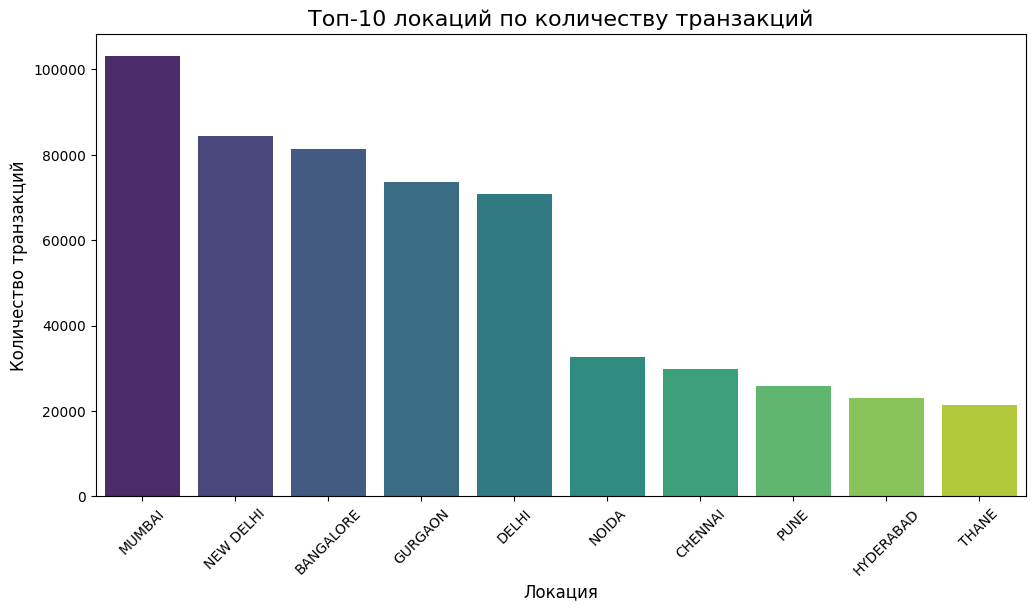

<ipython-input-68-34c7057b0dfb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_locations_by_sum, x='custlocation', y='total_transaction_amount', palette='coolwarm')


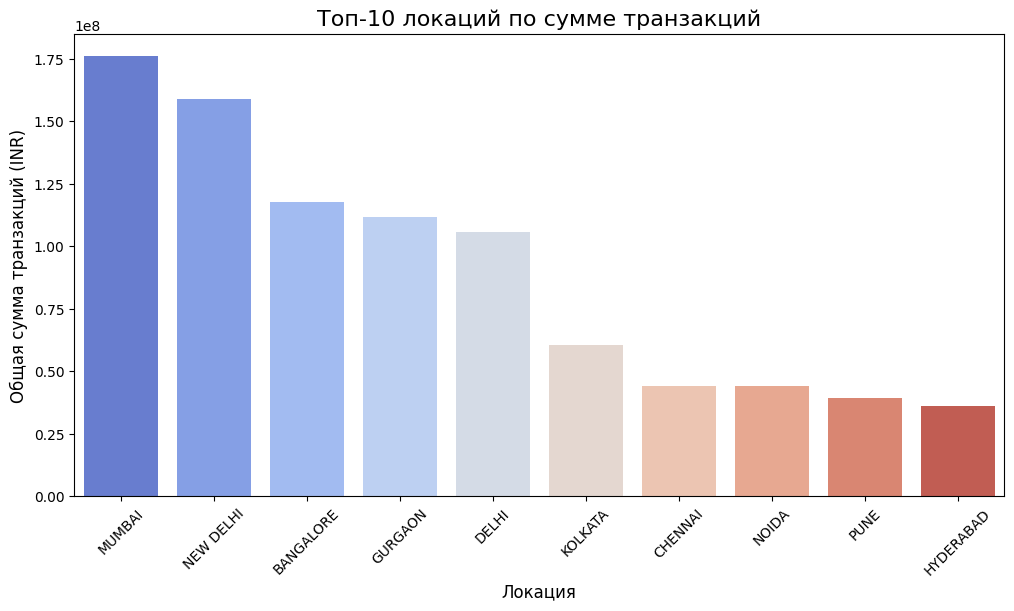

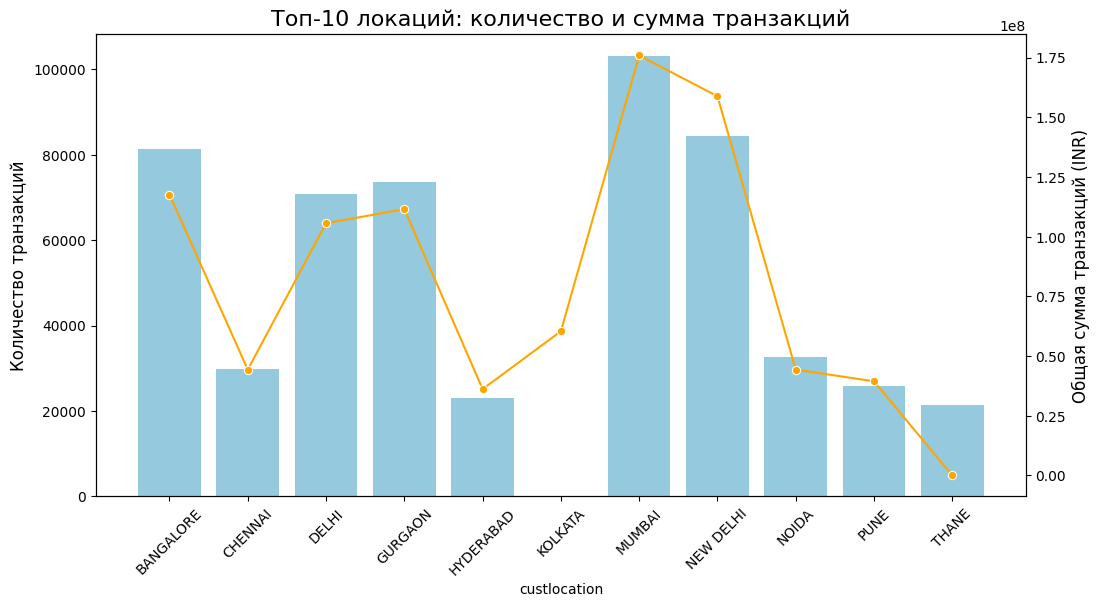

In [ ]:
# посмотреть распредление транзакций по локации – вывести топ 10 по кол-ву транзакций/сумме транзакций
# Группировка по локации и подсчет количества транзакций
transactions_count_by_location = df.groupby('custlocation').size().reset_index(name='transaction_count')

# Сортировка по убыванию и выбор топ-10
top_10_locations_by_count = transactions_count_by_location.sort_values(by='transaction_count', ascending=False).head(10)

# Визуализация топ-10 локаций по количеству транзакций
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_locations_by_count, x='custlocation', y='transaction_count', palette='viridis')
plt.title('Топ-10 локаций по количеству транзакций', fontsize=16)
plt.xlabel('Локация', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей для лучшей читаемости
plt.show()

# Группировка по локации и подсчет общей суммы транзакций
transactions_sum_by_location = df.groupby('custlocation')['transactionamount(inr)'].sum().reset_index(name='total_transaction_amount')

# Сортировка по убыванию и выбор топ-10
top_10_locations_by_sum = transactions_sum_by_location.sort_values(by='total_transaction_amount', ascending=False).head(10)

# Визуализация топ-10 локаций по сумме транзакций
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_locations_by_sum, x='custlocation', y='total_transaction_amount', palette='coolwarm')
plt.title('Топ-10 локаций по сумме транзакций', fontsize=16)
plt.xlabel('Локация', fontsize=12)
plt.ylabel('Общая сумма транзакций (INR)', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей для лучшей читаемости
plt.show()

# Объединение данных по количеству и сумме транзакций
top_10_combined = top_10_locations_by_count.merge(
    top_10_locations_by_sum, on='custlocation', how='outer'
).fillna(0)

# Переименование столбцов для удобства
top_10_combined.columns = ['custlocation', 'transaction_count', 'total_transaction_amount']

# Визуализация на одном графике
fig, ax1 = plt.subplots(figsize=(12, 6))

# Левая ось: количество транзакций
sns.barplot(data=top_10_combined, x='custlocation', y='transaction_count', color='skyblue', ax=ax1)
ax1.set_ylabel('Количество транзакций', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Правая ось: сумма транзакций
ax2 = ax1.twinx()
sns.lineplot(data=top_10_combined, x='custlocation', y='total_transaction_amount', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Общая сумма транзакций (INR)', fontsize=12)

plt.title('Топ-10 локаций: количество и сумма транзакций', fontsize=16)
plt.show()

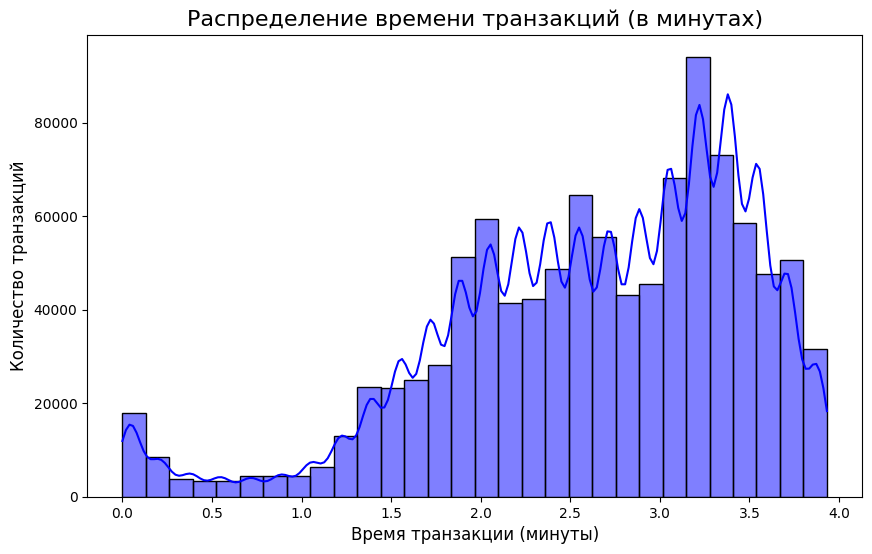

In [ ]:
# посмотреть распределение времени транзакции (TransactionTime). Перевести из миллисекунд в минуты
# Перевод времени из миллисекунд в минуты
df['TransactionTime_minutes'] = df['transactiontime'] / 60000

# Гистограмма распределения времени транзакций
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionTime_minutes'], bins=30, kde=True, color='blue')
plt.title('Распределение времени транзакций (в минутах)', fontsize=16)
plt.xlabel('Время транзакции (минуты)', fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1. Количество уникальных клиентов: 884265
2. Общее количество транзакций: 1048567
3. Среднее количество транзакций на клиента: 1.19
4. Основной тип клиентов - мужчины в возрасте от 36 до 50 лет
5. Основное место жительство клиентов: Mumbai
6. Наиболее интенсивные транзакции были в период с 01.08.2016 по 15-09-2016
7. Максимальное количество транзакций было из Mumbai и New Delhi
8. Время транзакции в основном было в диапазоне от 2 до 4 минут